# Exploratory Data Analysis

## 1.) Import Necessary Packages

In [2]:
# Import necessary packages

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import pylab as py
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## 2.) Overview of The Data

### 2.1) Load the data

In [3]:
# Load the train data and test data

train_raw = pd.read_csv('Data/train_data/train.csv')
test_raw = pd.read_csv('Data/test_data/test.csv')

### 2.2) Getting a Glimpse of the Data

In [4]:
# Print top 5 rows in train_raw data frame

train_raw.head(5)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Total number of Observations in train data

print('Number of rows in train data: ',len(train_raw))

Number of rows in train data:  4209


<b> Observations: </b>
- There are 378 columns and 4209 rows in training data. 
- The target variable 'y' is real valued. Most of the features are either categorical or binary in nature. However 'ID' values are integers.
- Column names seem in numerical order. There are holes in the order e.g. the feature 'X7' is missing.
- The values in 'ID' feature are not consecutive integers. Need to check if 'ID' has any predictive capacity.

In [6]:
# Print top 5 rows in test_raw data frame
test_raw.head(5)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
# Total number of Observations in test data

print('Number of rows in test data: ',len(test_raw))

Number of rows in test data:  4209


<b> Observations: </b>
- The values missing from 'ID' feature of train data are present in Test data.
- There 377 columns and 4209 rows in test data. 
- Target variable not present in test data.
- Number of data points in train and test data is same.

### 2.3) Check for Null values and Get the Cardinality of Features

#### 2.3.1) Check presence of Null Values

In [8]:
# Check for null values in the data.

print('Number of null values in train data: ',train_raw.isnull().any().sum())
print('Number of null values in test data: ',test_raw.isnull().any().sum())

Number of null values in train data:  0
Number of null values in test data:  0


#### 2.3.2) Check the Cardinality of Features

In [9]:
# Count the number of categorical, binary features, and features that have only one unique value.

binary = 0                    # count of binary features
one_unique_value = 0          # count of single valued features
categorical = 0               # count of categorical features
single_value_features = {}    # store features that have only one unique value
Number_of_categories = {}     # Store the number of categories that each categorical feature has
for column_name in train_raw.columns[2:]:
    if train_raw[column_name].nunique() == 2:
        binary += 1
    if train_raw[column_name].nunique() == 1:
        one_unique_value += 1
        single_value_features[column_name] = train_raw[column_name].nunique()
    if train_raw[column_name].nunique() >2:
        categorical += 1
        Number_of_categories[column_name] = train_raw[column_name].nunique()

print('Number of features with only one unique value: ',one_unique_value)
print('Number of features with two unique values: ',binary)
print('Number of features with more than two unique values: ',categorical)
print('Features with only one unique value: ',list(single_value_features.keys()))

Number of features with only one unique value:  12
Number of features with two unique values:  356
Number of features with more than two unique values:  8
Features with only one unique value:  ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


<b> Observations: </b>
- There are twelve features with only one unique value. These features are not adding any value as they are practically constant meaning they have zero variation. We will have to remove these features.
- There are 356 binary features and 8 categorical features.

Number of categories in the categorical features:  {'X0': 47, 'X1': 27, 'X2': 44, 'X3': 7, 'X4': 4, 'X5': 29, 'X6': 12, 'X8': 25}


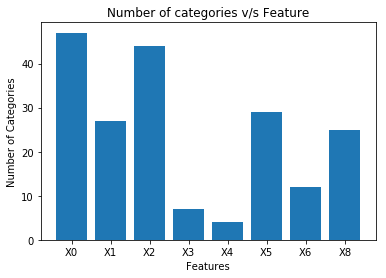

In [10]:
# Plot the cardinality of categorical features.

print('Number of categories in the categorical features: ', Number_of_categories)
plt.bar(Number_of_categories.keys(),Number_of_categories.values())
plt.xlabel('Features')
plt.ylabel('Number of Categories')
plt.title('Number of categories v/s Feature')
plt.show()

<b> Observations: </b>
- X0 has the highest number of categories: 47
- X4 has the least number of categories: 4

## 3.) Analyse target variable

### 3.1) Plot the PDF and Histogram of Target Variable 'y'

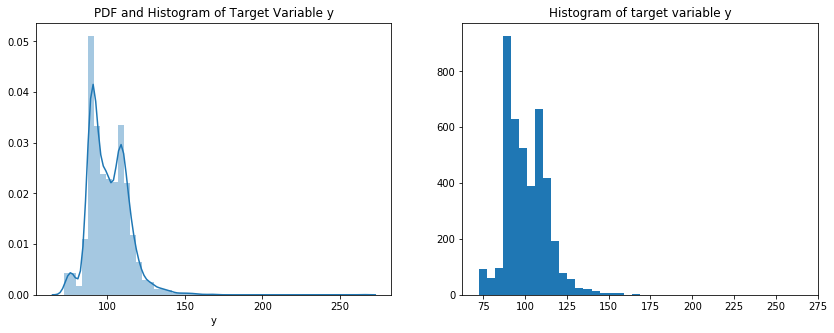

In [11]:
# PDF of Target Variable.
# Histogram of Target Variable

plt.figure(figsize=(14,5)) 
plt.subplot(1,2,1)
sns.distplot(train_raw['y'])
plt.title('PDF and Histogram of Target Variable y')

plt.subplot(1,2,2)
plt.hist(train_raw['y'],bins=40)
plt.title('Histogram of target variable y')
plt.show()

<b> Observations: </b>
- Most of the target values lie between 75 and 125.
- Distribution doesn't look like any of the standard distributions. 
- Distribution doesn't not look like Gaussian.
- There is a high chance that data has outliers in the far right (long tail in the right side).

### 3.2) Boxplot Representation of Target variable

#### 3.2.1) Boxplot of y

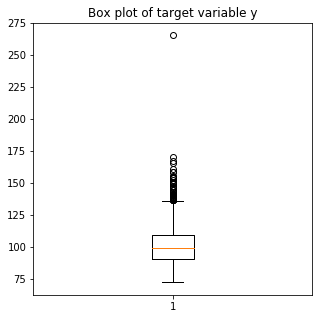

In [12]:
# BoxPLOT of Target Variable.

plt.figure(figsize=(5,5))
plt.boxplot(train_raw['y'])
plt.title('Box plot of target variable y')
plt.show()

#### 3.2.2) High Level Stats of y

In [13]:
# High level statistics of Target Variable.

print('High level statistics of Target Variable y:')
pd.DataFrame([dict(train_raw.y.describe())]).head()

High level statistics of Target Variable y:


,25%,50%,75%,count,max,mean,min,std
0,90.82,99.15,109.01,4209.0,265.32,100.669318,72.11,12.679381


<b> Observations: </b>
- There is an extreme outlier with a value larger than 250 according to the boxplot.
- Mean (100.6) and median (99.15) are very close; effect of outlier on mean is not too much.
- Minimum value (72.1 seconds) is just 28.5 seconds less than mean (100.66 seconds) but maximum value (265.32 seconds) is 164.6 seonds more than the mean.
- Some cars are taking unusually longer time for testing than the rest of the cars.  
- Most of the testing is done automatically but a human driver/operator also drives the car on the test bench (mentioned by host on kaggle discussion), these outliers could be due to human error or some cars have a very different configeration and require different set of tests and hence more time is consumed.

### 3.3) Investigate the outliers

#### 3.3.1) Check y values between 90th and 100th percentile 

90th to 100th percentile values of y:  [115.25   116.0484 116.8916 118.0376 119.056  120.806  122.4    125.8932
 129.2992 137.4304 265.32  ]


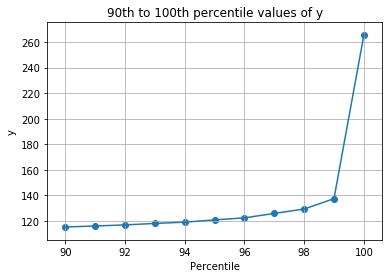

In [14]:
# Investigate presence of outliers between 90th and 100the percentile

percentile = [90,91,92,93,94,95,96,97,98,99,100]
percentile_values = np.percentile(np.array(train_raw.y),percentile)
print("90th to 100th percentile values of y: ",percentile_values)
plt.plot(percentile,percentile_values)
plt.scatter(percentile,percentile_values)
plt.xlabel('Percentile')
plt.ylabel('y')
plt.title('90th to 100th percentile values of y')
plt.grid()
plt.show()

<b> Observation </b>
- 90th percentile value is close to 120 and 99th percentile is near 140 but 100th percentile is near 260. That is very high jump in values from 99th to 100th percentile.
- y values suddenly start increasing after the 99th percentile. We need to zoom in further between 99th and 100th percentile.

#### 3.3.2) Check y values between 99.1 and 100th percentile 

99.1 to 100th percentile values of y:  [139.09024 140.1836  140.8164  142.648   146.2304  149.03744 151.42768
 154.68696 160.38328 265.32   ]


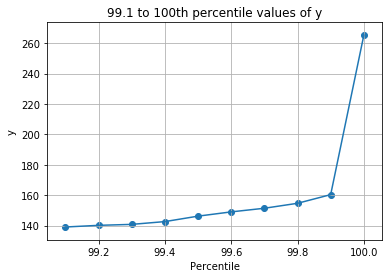

In [15]:
# Investigate presence of outliers between 99.1 and 100the percentile

percentile = [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]
percentile_values = np.percentile(np.array(train_raw.y),percentile)
print("99.1 to 100th percentile values of y: ",percentile_values)
plt.plot(percentile,percentile_values)
plt.scatter(percentile,percentile_values)
plt.xlabel('Percentile')
plt.ylabel('y')
plt.title('99.1 to 100th percentile values of y')
plt.grid()
plt.show()

<b> Observation </b>
- y value is sharply increasing after 99.9th percentile from 160 to 265

#### 3.3.3) Check how many outlier data points we can remove

In [16]:
# Count the outliers 

print('Number of points with a y value higher than 140: ', len(train_raw[train_raw['y']>140]))
print('Number of points with a y value higher than 150: ', len(train_raw[train_raw['y']>150]))
print('Number of points with a y value higher than 160: ', len(train_raw[train_raw['y']>160]))

Number of points with a y value higher than 140:  35
Number of points with a y value higher than 150:  15
Number of points with a y value higher than 160:  5


In [17]:
# View the outliers

print('Observations with y value higher than 160: ')
train_raw[train_raw['y'] > 160]

Observations with y value higher than 160: 


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
342,681,169.91,aa,l,ak,f,d,i,c,d,...,0,0,0,0,0,0,0,0,0,0
883,1770,265.32,y,r,ai,f,d,ag,l,t,...,0,0,0,0,0,0,0,0,0,0
1203,2396,160.87,j,o,as,f,d,ab,g,p,...,1,0,0,0,0,0,0,0,0,0
1459,2903,167.45,ai,b,ae,a,d,ac,g,m,...,0,0,1,0,0,0,0,0,0,0
3133,6273,165.52,aj,v,r,c,d,q,g,a,...,0,0,1,0,0,0,0,0,0,0


<b> Observations: </b>
- There is one extreme outlier at 'ID' 1770 with y value of 265.32; we need to remove this point.
- There are five points that have a value larger than 160. If we remove all these five points, we loose 0.11 percent of the data points.
- 35 data points have a y value higher than 140 (99.2 percentile), if we remove these 35 points we loose 0.83 percent of the data points.

### 3.4) Check the similarity between y and the gaussian distribution

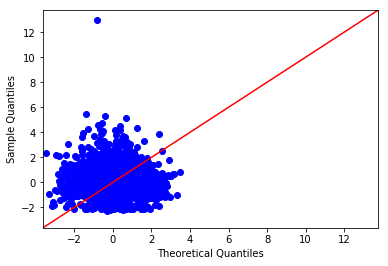

In [18]:
# Check the similarity between the distribution of y and the gaussian distribution using QQ PLot.

y_values = np.array(train_raw['y']).reshape(-1,1)

scaler = StandardScaler()
standardised_y_values = scaler.fit_transform(y_values)

sm.qqplot(standardised_y_values, line ='45')
py.show()

<b> Observatoins </b>
- Quantile Quantile plot is straight line if both distributions are same. Here, we are comparing y values to a standard normal distributed data.
- Plot is not a straight line, meaning y is not gaussian distributed.

## 4.) Analyse the categorical features

### 4.1) Check for Imbalance Category Counts for Categorical Features

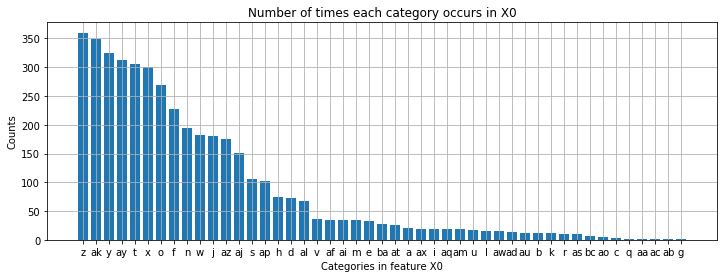

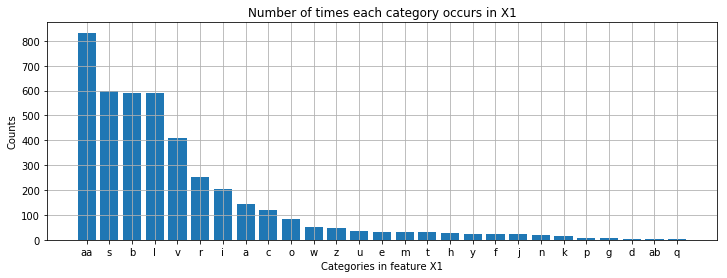

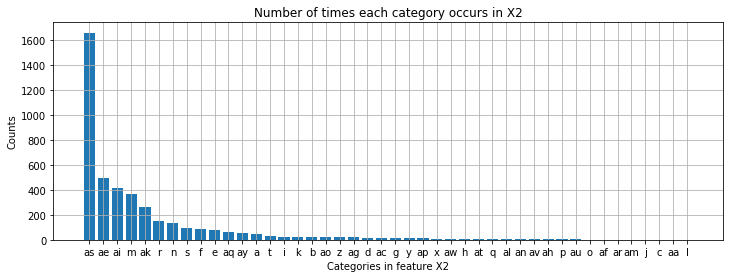

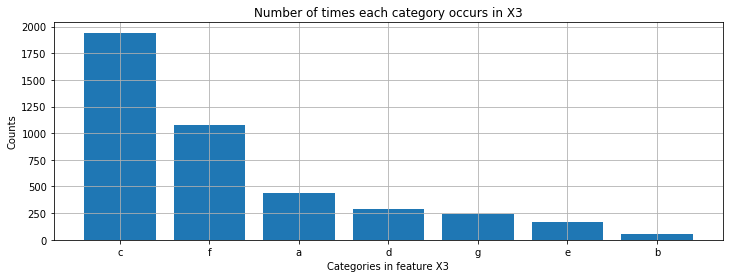

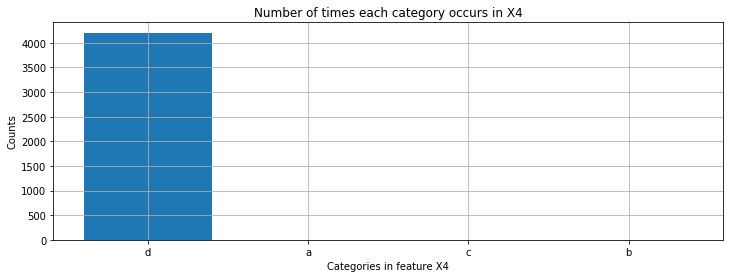

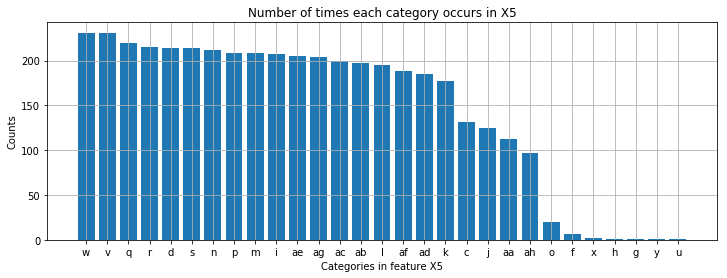

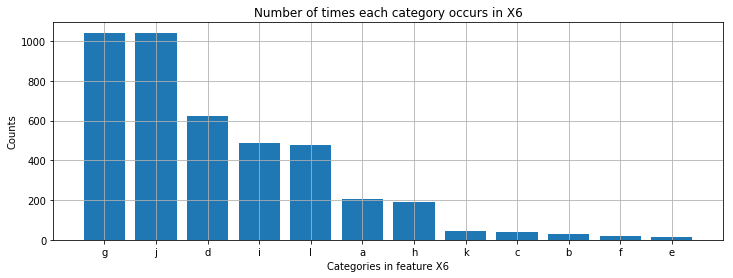

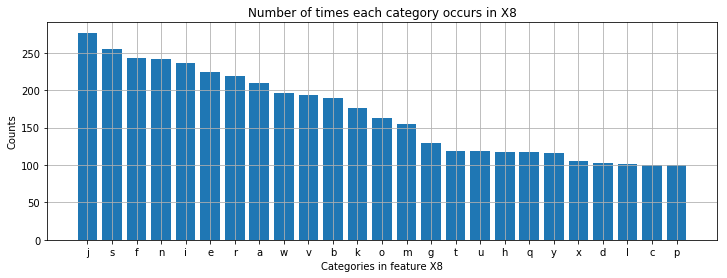

In [19]:
# Get the Count of each category in a feature. Check the categories that occur a very small number of times.

for column in train_raw.columns[2:10]: 
    plt.figure(figsize=(12,4))
    plt.bar(list(train_raw[column].value_counts().index),list(train_raw[column].value_counts().values))
    plt.xlabel('Categories in feature '+column)
    plt.ylabel('Counts')
    plt.title('Number of times each category occurs in '+column)
    plt.grid()
    plt.show()

<b> Observations: </b>
- Simple one hot encoding would create 195 dimensional vector for all the categorical features combined. 
- 'X0': There are 47 different categories. Feature is not balanced perfectly. Top categories such as 'z', 'ak', 'y', 'ay, 't' etc. occur a lot of times while categories like 'ab', 'ac' and 'g' only occur once.
- 'X1': There are 27 different categories in 'X1'. The top category 'aa' occurs 833 times while categories such as 'ab', 'd' and 'q' occurs only three times each.
- 'X2': There are 44 different categories in 'X2'. The top category 'as' occurs 1659 times while categories such as 'j', 'l', 'c', 'af', 'o' 'ar', 'aa' and 'am' occur only once. 
- 'X4': Feature X4 is highly imbalanced. There are four categories. Category 'd' occcurs more than 4000 times while categories 'a' occurs twice and 'b' and 'c' only once. <b> We should remove this feature as most of the data points have same value for feature feature 'X4' </b>

- Feature X8 is the least imbalanced feature.

### 4.2) X0 versus y

#### 4.2.1) Remove the extreme outlier for the sake of the visuals

In [20]:
# Dropping the extreme outlier 

train_raw_or = train_raw.drop(labels=883, axis=0)

#### 4.2.2) X0 v/s y

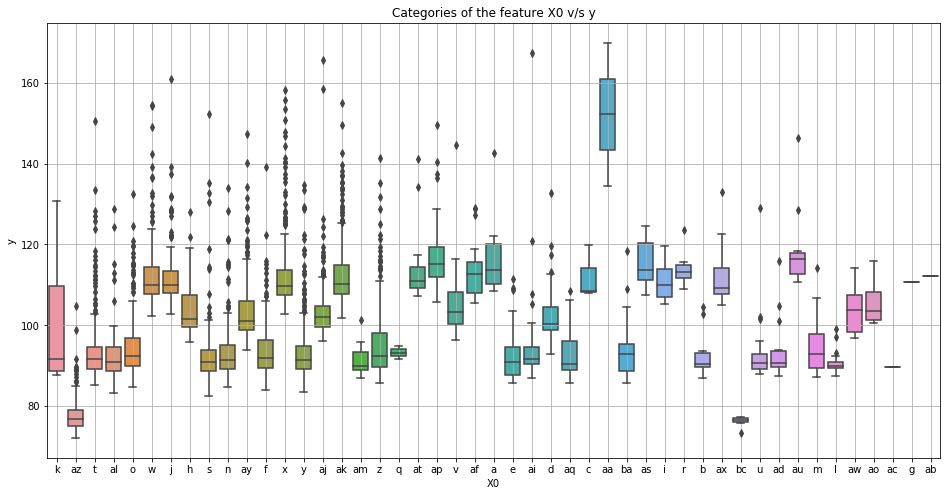

In [21]:
# Target variable 'y' with respect to categories of 'X0' after removing the extreme outlier.

plt.figure(figsize=(16,8))
sns.boxplot(x=train_raw_or['X0'], y=train_raw_or['y'])
plt.title('Categories of the feature X0 v/s y')
plt.grid()
plt.show()

<b> Observations </b>
- There is a good amount variance in 'y' for the 'X0'. There is decent seperation between categories. 
- Our previous idea to remove all the data points with 'y' values greater than 140 is not a very good idea because the category 'aa' can clearly define 'y' values greater than 140.
- Variation in 'y' corresponding to categories like 'ac', 'g', 'ab' is very small.

### 4.3) X1 versus y

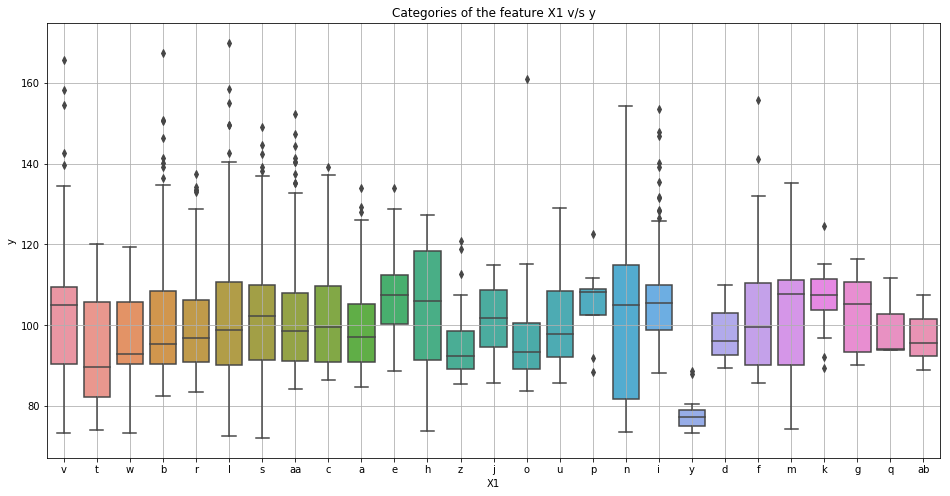

In [22]:
# Distributioin of target variable 'y' with respect to categories of 'X1'

plt.figure(figsize=(16,8))
sns.boxplot(x=train_raw_or['X1'], y=train_raw_or['y'])
plt.title('Categories of the feature X1 v/s y')
plt.grid()
plt.show()

<b> Observations </b>
- Most categories lie between y = 80 and y = 120.
- Some seperation can be observed

### 4.4) X2 versus y

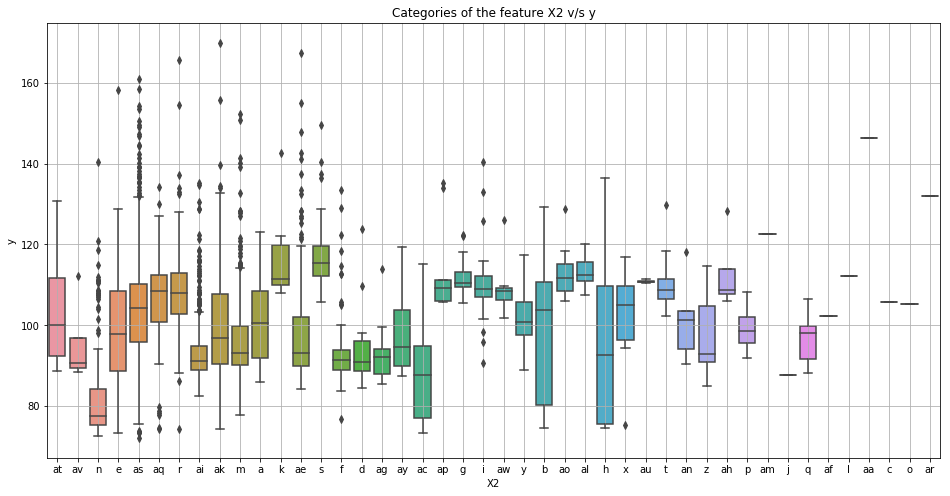

In [23]:
# Distributioin of target variable 'y' with respect to categories of 'X2'

plt.figure(figsize=(16,8))
sns.boxplot(x=train_raw_or['X2'], y=train_raw_or['y'])
plt.title('Categories of the feature X2 v/s y')
plt.grid()
plt.show()

<b> Observations </b>
- There is good seperation visible between the categories.
-  Variation in 'y' corresponding to categories like 'af', 'l', 'aa', 'c' 'o', 'ar', 'j' and 'am' is very small. We can either remove them or combine them together.

### 4.5) X3 versus y

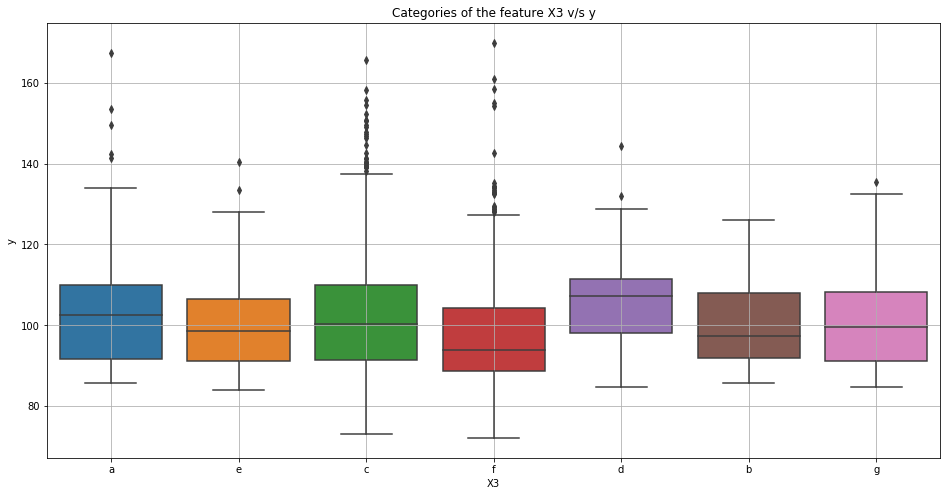

In [24]:
# Distributioin of target variable 'y' with respect to categories of 'X3'

plt.figure(figsize=(16,8))
sns.boxplot(x=train_raw_or['X3'], y=train_raw_or['y'])
plt.title('Categories of the feature X3 v/s y')
plt.grid()
plt.show()

<b> Observations </b>
- There is small ammount of seperation visible in the categories for feature 'X3'. 

### 4.6) X4 versus y

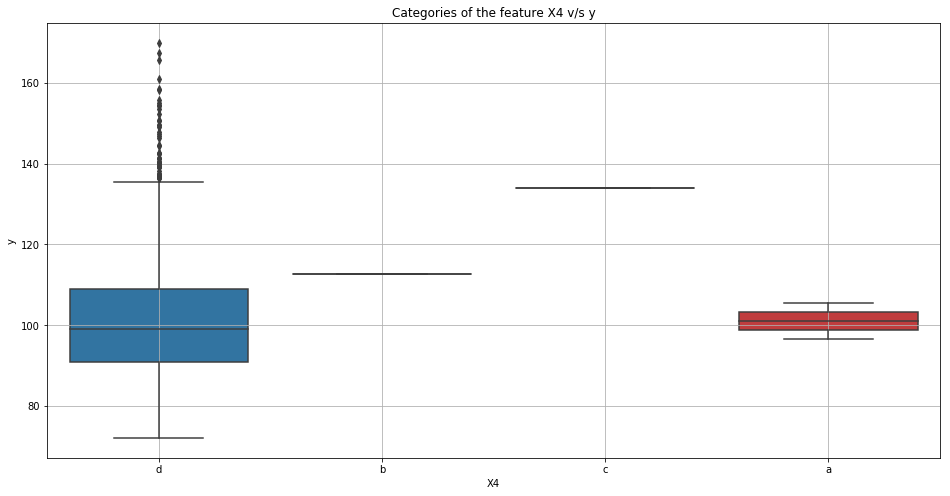

In [25]:
# Distributioin of target variable 'y' with respect to categories of 'X4'

plt.figure(figsize=(16,8))
sns.boxplot(x=train_raw_or['X4'], y=train_raw_or['y'])
plt.title('Categories of the feature X4 v/s y')
plt.grid()
plt.show()

<b> Observatoins </b>
- Variation in 'y' corresponding to categories 'b', 'c' and 'a' is very small.
- Category 'd' occurs a lot. There is a high imabalance in the categories.
- Category 'b', 'c', 'a' occur a total of 4 times in the whole training data. We should remove this feature.

### 4.7) X5 versus y

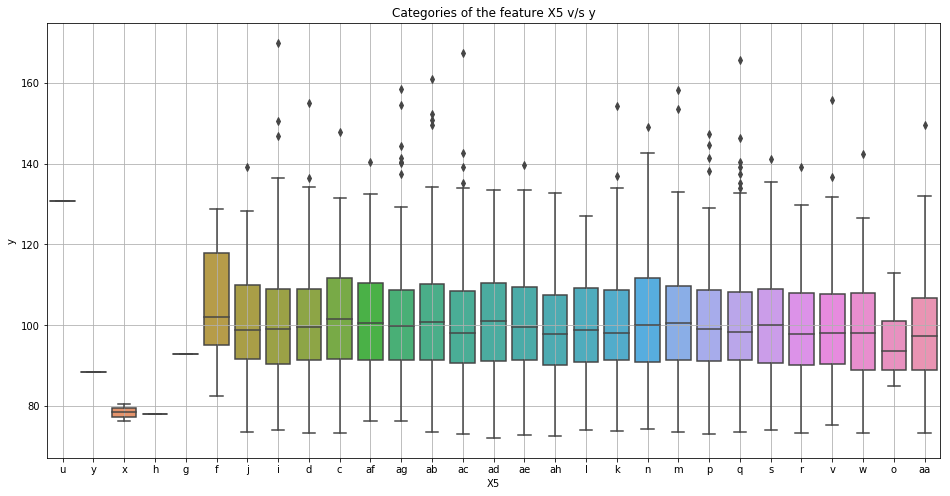

In [26]:
# Distributioin of target variable 'y' with respect to categories of 'X5'

plt.figure(figsize=(16,8))
sns.boxplot(x=train_raw_or['X5'], y=train_raw_or['y'])
plt.title('Categories of the feature X5 v/s y')
plt.grid()
plt.show()

<b> Observatoins </b>
- There is a small seperation in categories.
- Variation in 'y' corresponding to categories 'g', 'h', 'u' and 'y' is very small. We should remove these categories or we can combine them.

### 4.8) X6 versus y

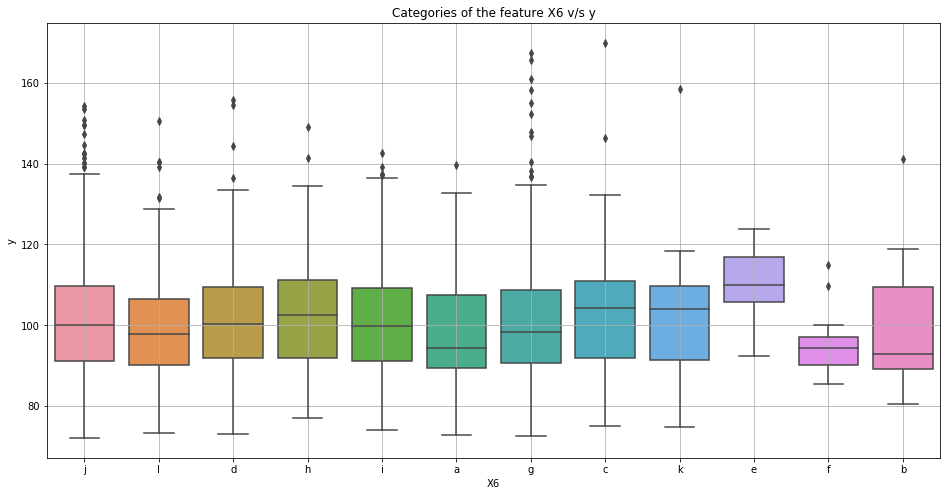

In [27]:
# Distributioin of target variable 'y' with respect to categories of 'X6'

plt.figure(figsize=(16,8))
sns.boxplot(x=train_raw_or['X6'], y=train_raw_or['y'])
plt.title('Categories of the feature X6 v/s y')
plt.grid()
plt.show()

<b> Observatoins </b>
- Small seperation is visible for the categories. 

### 4.9) X8 versus y

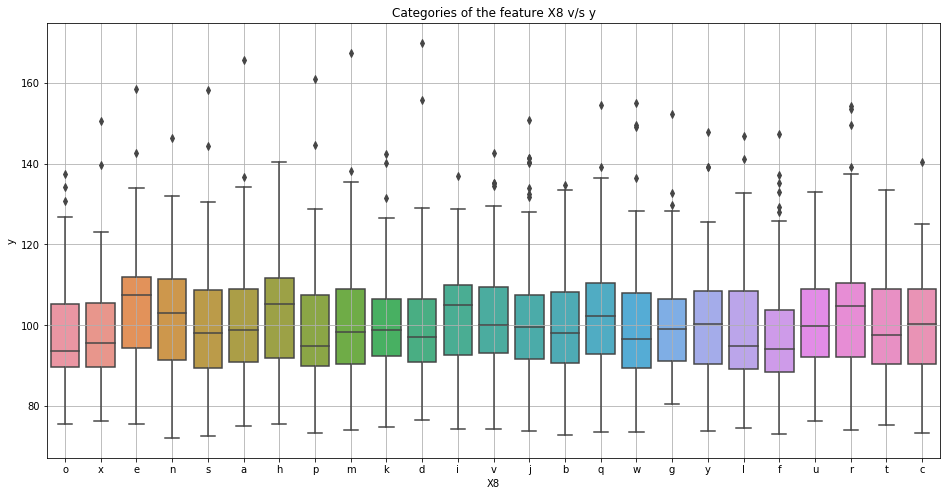

In [28]:
# Distributioin of target variable 'y' with respect to categories of 'X8'

plt.figure(figsize=(16,8))
sns.boxplot(x=train_raw_or['X8'], y=train_raw_or['y'])
plt.title('Categories of the feature X8 v/s y')
plt.grid()
plt.show()

<b> Observatoins </b>
- Small seperation visible in the categories

## 5.) Impact of Individual features on target variable 'y'

### 5.1) Individual Impact of categorical features on 'y'

#### 5.1.1) Create Seperate Dataframe for Categorical Features

In [29]:
# Extract the categorical features into new dataframes

categorical_features = ['X0','X1','X2','X3','X4','X5','X6','X8']
train_categorical = train_raw[categorical_features]
test_categorical = test_raw[categorical_features]

#### 5.1.2) Encode the categorical Features

In [33]:
# Perform one hot encoding on categorical Features

enc = OneHotEncoder(handle_unknown = 'ignore')
encoder = enc.fit(train_categorical)
train_categorical_ohe = encoder.transform(train_categorical)
test_categorical_ohe = encoder.transform(test_categorical)

print('Categorical Features Train data shape: ',train_categorical_ohe.toarray().shape)
print('Categorical Features Test data shape: ',test_categorical_ohe.toarray().shape)

Categorical Features Train data shape:  (4209, 195)
Categorical Features Test data shape:  (4209, 195)


#### 5.1.3) R-Squared Score For Categorical Features

In [35]:
# Get R-squared score for all the categorical features combined and seperately. Use Randomforestregressor to make predictions.
# Check the correlation between each categorical feature and target variable y.

rf = RandomForestRegressor(n_estimators=20, max_depth=3, random_state=3)  # No intensive hyperparameter tuning done here.
rf.fit(train_categorical_ohe,train_raw['y'])
y_pred_train = rf.predict(train_categorical_ohe)
train_score = r2_score(train_raw['y'],y_pred_train)
print('R-squared score when we use all the categorical features: ',round(train_score,4))
start_index = 0
end_index = 0
for i in range(len(encoder.categories_)):
    num_categories = len(encoder.categories_[i])
    end_index = start_index + num_categories
    tr_data = train_categorical_ohe[:,start_index:end_index]
    start_index = end_index
    rf = RandomForestRegressor(n_estimators=20, max_depth=4, random_state=3)
    rf.fit(tr_data,train_raw['y'])
    y_pred_train = rf.predict(tr_data)
    train_score = r2_score(train_raw['y'],y_pred_train)
    print('R-squared score when we use only ' + categorical_features[i] + ' :',round(train_score,4))

R-squared score when we use all the categorical features:  0.2782
R-squared score when we use only X0 : 0.3512
R-squared score when we use only X1 : 0.033
R-squared score when we use only X2 : 0.1632
R-squared score when we use only X3 : 0.0422
R-squared score when we use only X4 : 0.0017
R-squared score when we use only X5 : 0.0089
R-squared score when we use only X6 : 0.0094
R-squared score when we use only X8 : 0.0213


<b> Observations </b>
- 'X4' has the least value of R-squared followed by 'X5'. R-squared for 'X4' = 0.0017 and for 'X5' = 0.0089.
- 'X0' and 'X2' are the top scoring features.

### 5.2) Individual Impact of Binary Features on 'y'

#### 5.2.1) Create a Sperate Dataframe for Binary Features

In [36]:
# Create a Sperate Dataframe for Binary Features

train_binary_features = train_raw.iloc[:,10:]
binary_feature_names = train_raw.columns[10:]

#### 5.2.2) R-Squared Score for the Binary Features

In [47]:
# R-squared score when we use all the binary features for training

rf = RandomForestRegressor(n_estimators=20, max_depth=3, random_state=3)
rf.fit(train_binary_features,train_raw['y'])
y_pred_train = rf.predict(train_binary_features)
train_score = r2_score(train_raw['y'],y_pred_train)
print('R-squared score when we use all the binary features: ',round(train_score,4))

R-squared score when we use all the binary features:  0.5745


In [48]:
# get the R-squared score for binary features individually

R_squared_binary_fea = {}
for i in binary_feature_names:
    tr_data = np.array(train_binary_features[i]).reshape(-1,1)
    rf = RandomForestRegressor(n_estimators=20, max_depth=3, random_state=3)
    rf.fit(tr_data,train_raw['y'])
    y_pred_train = rf.predict(tr_data)
    train_score = r2_score(train_raw['y'],y_pred_train)
    R_squared_binary_fea[i] = train_score

In [49]:
# Top 20 high scoring binary features

print('Binary features with highest individual R_squared value in increasing order: ')
for i in (sorted(R_squared_binary_fea.items(), key = lambda item:item[1])[-20:]):
    print(i)

Binary features with highest individual R_squared value in increasing order: 
('X119', 0.07437117210220678)
('X275', 0.07563185974824405)
('X178', 0.08234301492984375)
('X250', 0.08922132249347758)
('X166', 0.1095086037279348)
('X313', 0.10953276029717252)
('X272', 0.12310549263358972)
('X162', 0.12658115259358205)
('X276', 0.129058138003031)
('X328', 0.13411105343167362)
('X54', 0.1354834097919091)
('X76', 0.1354834097919091)
('X136', 0.1354834097919091)
('X29', 0.14411338549186425)
('X232', 0.14411338549186425)
('X263', 0.14411338549186425)
('X279', 0.14411338549186425)
('X127', 0.26072887290879254)
('X261', 0.3466608096684699)
('X314', 0.36723556641696353)


In [50]:
# Binary features with a negative R-squared score
# Store Most negative scoring 20 features in a dict

print('Binary features with negative individual R_squared value: ')
binary_features_negative_r2 = []
for i in (sorted(R_squared_binary_fea.items(), key = lambda item:item[1])[:20]):
  if i[1] < 0:
        print(i)
        binary_features_negative_r2.append(i[0])

Binary features with negative individual R_squared value: 
('X18', -1.806121446001896e-05)
('X240', -1.697082533480554e-05)
('X364', -1.697082533480554e-05)
('X365', -1.697082533480554e-05)
('X182', -1.180561656677348e-05)
('X294', -9.269772649256325e-06)
('X123', -8.127708972960335e-06)
('X32', -6.378972841503128e-06)
('X145', -2.505060397117731e-06)
('X340', -1.8228250997509576e-06)
('X11', -1.0007056656657909e-06)
('X93', -1.0007056656657909e-06)
('X107', -1.0007056656657909e-06)
('X233', -1.0007056656657909e-06)
('X235', -1.0007056656657909e-06)
('X268', -1.0007056656657909e-06)
('X289', -1.0007056656657909e-06)
('X290', -1.0007056656657909e-06)
('X293', -1.0007056656657909e-06)
('X297', -1.0007056656657909e-06)


<b> Observations: </b>
- 'X314', 'X261', 'X127' are the highest scoring features, means they are the most information rich features.
- Some binary features have a negative individual R-squared score. We can remove them as they are not adding any value to the prediction

### 6) Individual Impact of ID on 'y'

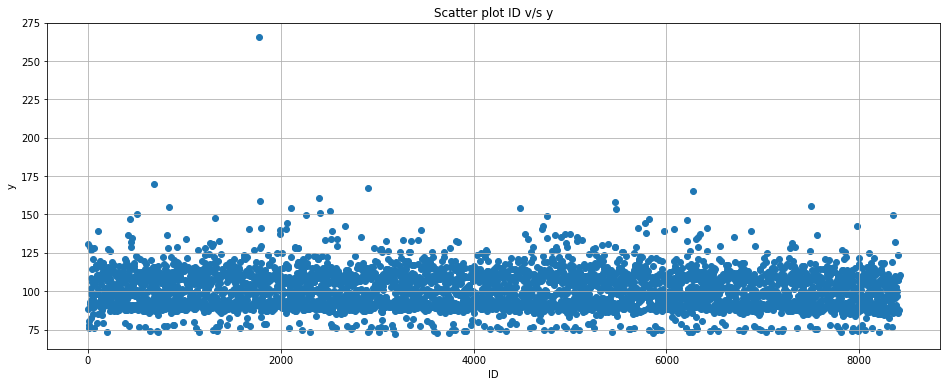

In [52]:
# Check the relationship between 'ID' column and the target variable 'y'

plt.figure(figsize=(16,6))
plt.scatter(train_raw['ID'],train_raw['y'])
plt.xlabel('ID')
plt.ylabel('y')
plt.title('Scatter plot ID v/s y')
plt.grid()
plt.show()

<b> Observation: </b>
- Initially I thought ID column is for providing order to the data points. But I think ID represents the temporal order in which tests were conducted. The value of y is slightly decreasing when the ID is increasing.